In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
### Reading the data

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv')

In [7]:
data.columns=data.columns.str.strip()

In [13]:
# columns of the data
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [12]:
# Basuc EDA of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [15]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [16]:
#the scale of data is different so it needs transformation

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

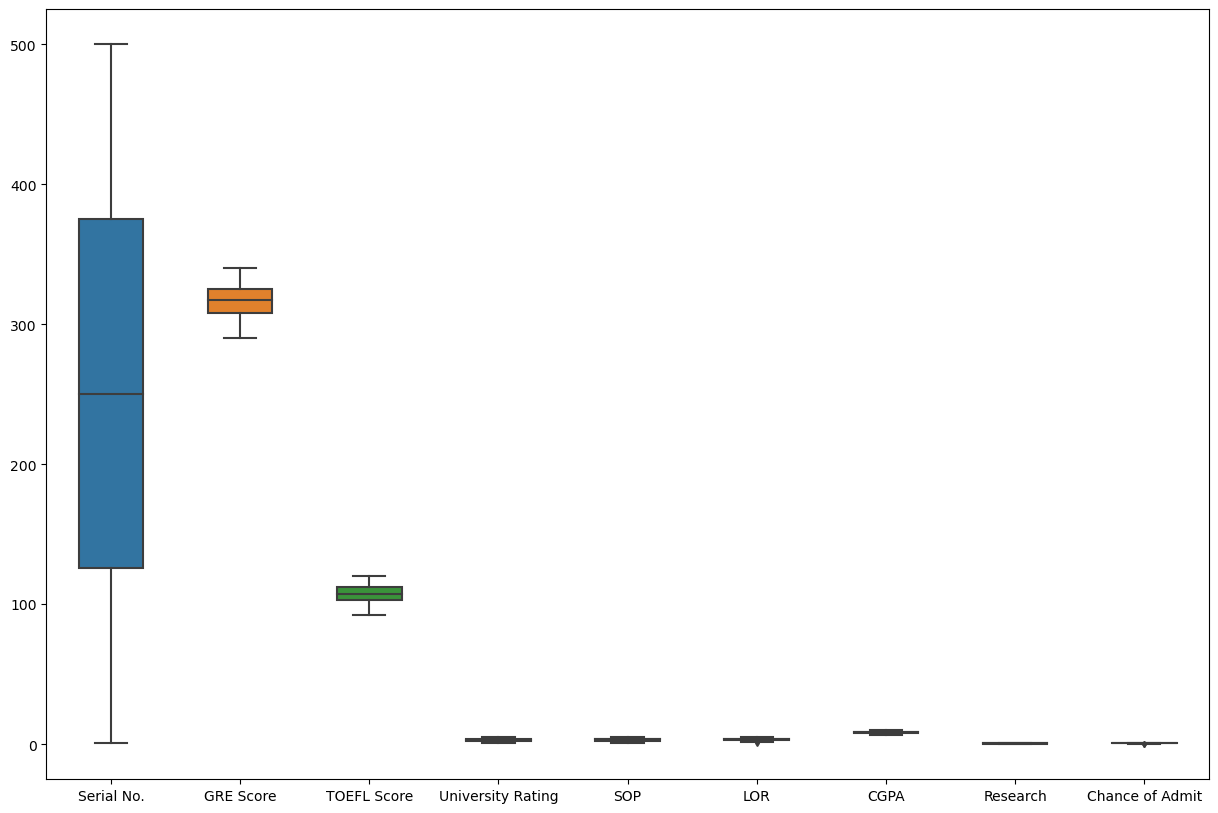

In [18]:
#checking for outliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [ ]:
# there seems to be not significant outliers

<AxesSubplot: >

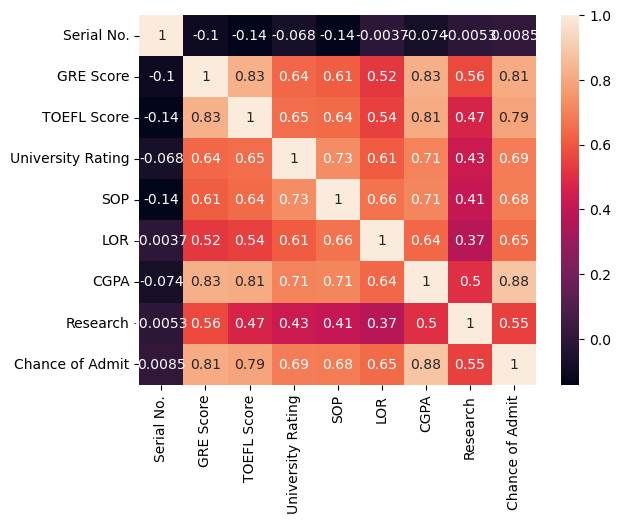

In [19]:
# checking for corr
sns.heatmap(data.corr(), annot=True)


In [20]:
# there is correlation between independent variables like CGPA,GRE SCoRe

In [22]:
# feature Engineering -- removing serial no as it doesnot have much effect for model prediction
final_data=data.drop('Serial No.', axis=1)

In [23]:
X = final_data.drop('Chance of Admit', axis=1)

In [24]:
y=final_data['Chance of Admit']

In [26]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [28]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [29]:
### train test split of the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
# transformation of data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [33]:
from sklearn.svm import SVR
model=SVR()

In [34]:
model.fit(X_train,y_train)

SVR()

In [36]:
model.score(X_train,y_train)

0.7757519357301844

In [38]:
y_pred=model.predict(X_test)

Text(0, 0.5, 'Test Predicted Data')

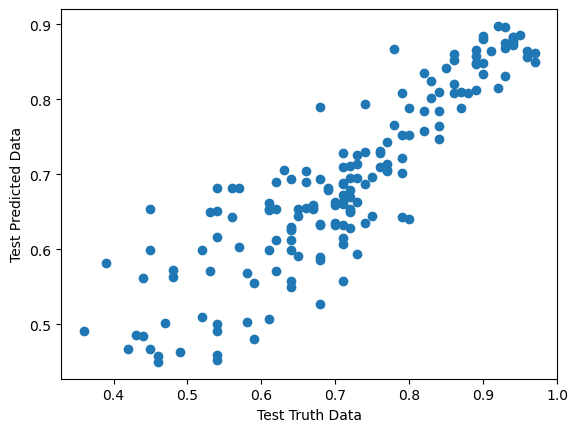

In [40]:
## Assumptions of Regression:
plt.scatter(y_test,y_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [41]:
residuals=y_pred-y_test

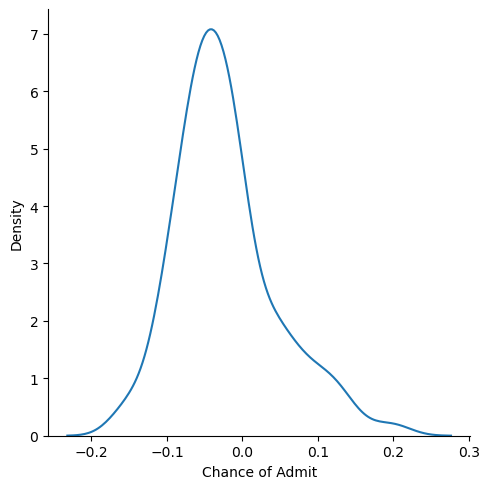

In [42]:
sns.displot(residuals,kind='kde')

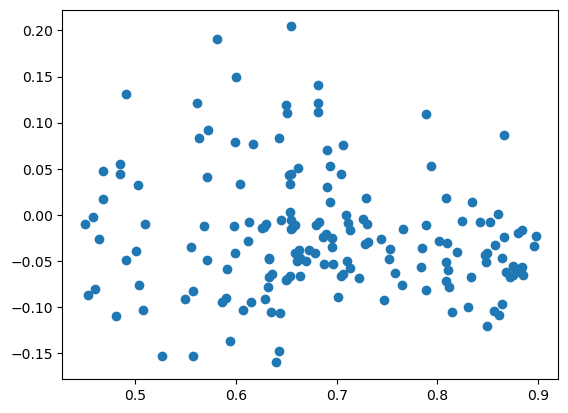

In [43]:
plt.scatter(y_pred,residuals)

In [44]:
#Performance Metrics

In [47]:
# R Square
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.7601877598637249


In [48]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7494954943799419

In [49]:
## using linear regression

In [52]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [53]:
reg_pred=regression.predict(X_test)

In [54]:
score=r2_score(y_test,reg_pred)
print(score)
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8242314445551622


0.8163946299811885

In [56]:
## HyperParemeter tuning of the SVR MODEL using GRIDSEARCHCV

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel': ['rbf'], 'C':[0.1, 1,10, 100, ],'gamma':[ 0.001, 0.1],'epsilon':[0.0001,  0.001, 0.005, 0.01, 0.05, 0.5, 1, 10]}

grid = GridSearchCV(SVR(), parameters, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END C=0.1, epsilon=0.0001, gamma=0.001, kernel=rbf;, score=0.664 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.0001, gamma=0.001, kernel=rbf;, score=0.735 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.0001, gamma=0.001, kernel=rbf;, score=0.743 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.0001, gamma=0.001, kernel=rbf;, score=0.683 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.0001, gamma=0.001, kernel=rbf;, score=0.816 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.0001, gamma=0.1, kernel=rbf;, score=0.682 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.0001, gamma=0.1, kernel=rbf;, score=0.811 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.0001, gamma=0.1, kernel=rbf;, score=0.786 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.0001, gamma=0.1, kernel=rbf;, score=0.769 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.0001, gamma=0.1, kernel=rbf;, score=0.881 total time=   0.0s
[CV 1/5] END C=0.1

In [ ]:
grid_pred = grid.predict(X_test)

In [78]:
score=r2_score(y_test,grid_pred)
print(score)
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8165493436557942


0.8083700150289825

In [79]:
grid.best_params_

{'C': 10, 'epsilon': 0.0001, 'gamma': 0.001, 'kernel': 'linear'}